In [26]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re

In [27]:
df = pd.read_csv("results.csv", delimiter=";")

df

,Value,min,50_pct,90_pct,99_pct,999_pct
0,SSL_write() [50],1276,1394,1480,1889,12191
1,SSL_write() with memcpy [50],1278,1415,1533,1840,12099
2,SSL_writev() [50],1281,1411,1494,1728,12128
3,SSL_write() [300],1381,1529,1628,5140,12418
4,SSL_write() with memcpy [300],1386,1531,1602,4786,12267
5,SSL_writev() [300],1366,1518,1598,4783,12304
6,SSL_write() [5000],2797,3140,7518,14804,23019
7,SSL_write() with memcpy [5000],2808,3124,7172,14685,21401
8,SSL_writev() [5000],2624,2977,7034,14311,19635
9,"SSL_write() [100, 50]",2629,2814,2981,5605,14632


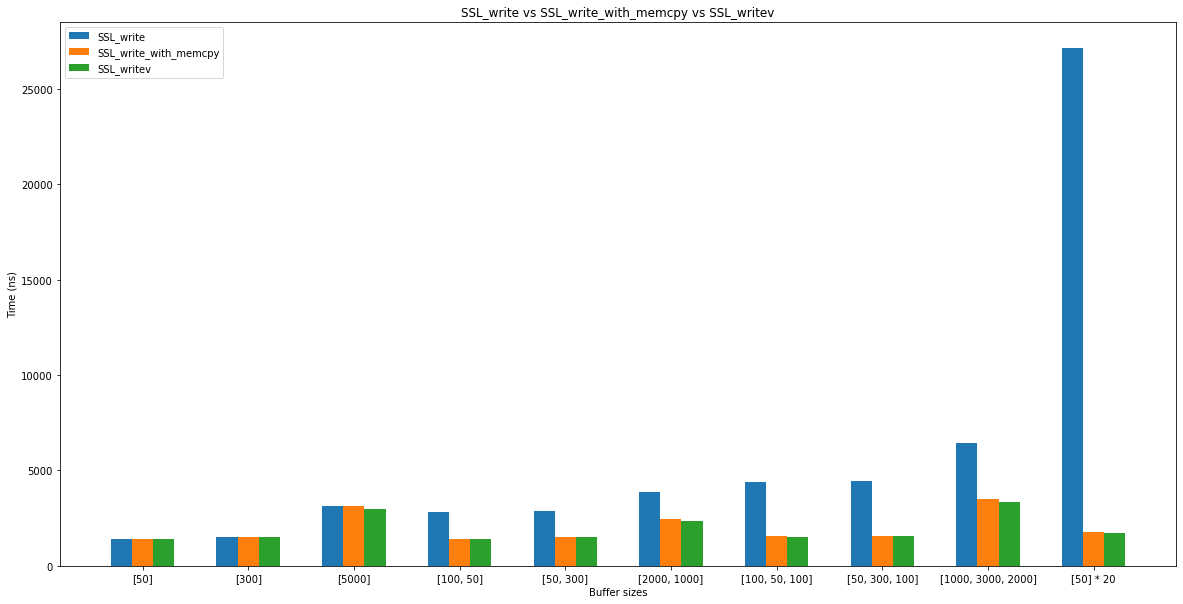

In [28]:
ARRAY_REGEX = r".*(\[.*\](\s\*\s\d+)?).*"
WIDTH = 0.2

x = []
SSL_write = []
SSL_write_with_memcpy = []
SSL_writev = []

for i in range(0, len(df), 3):
    x.append(re.match(ARRAY_REGEX, df["Value"].iloc[i]).group(1))
    SSL_write.append(df["50_pct"].iloc[i])
    SSL_write_with_memcpy.append(df["50_pct"].iloc[i + 1])
    SSL_writev.append(df["50_pct"].iloc[i + 2])

x_axis = np.arange(len(x))

plt.figure(figsize=(20, 10))

plt.bar(x_axis - WIDTH, SSL_write, width=WIDTH, label="SSL_write")
plt.bar(x_axis, SSL_write_with_memcpy, width=WIDTH, label="SSL_write_with_memcpy")
plt.bar(x_axis + WIDTH, SSL_writev, width=WIDTH, label="SSL_writev")

plt.xticks(x_axis, x)
plt.xlabel("Buffer sizes")
plt.ylabel("Time (ns)")
plt.title("SSL_write vs SSL_write_with_memcpy vs SSL_writev")
plt.legend()
plt.show()